In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"tariqalihazgmailcom","key":"5deb0efafe18bb06ae7068b486c5c1ad"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp 'kaggle (3).json' ~/.kaggle/kaggle.json  # Rename the file to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download bhaveshmittal/melanoma-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset
License(s): CC0-1.0
100% 79.0M/79.4M [00:05<00:00, 20.2MB/s]
100% 79.4M/79.4M [00:05<00:00, 16.0MB/s]


In [ ]:
!unzip melanoma-cancer-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Malignant/1530.jpg  
  inflating: train/Malignant/1531.jpg  
  inflating: train/Malignant/1532.jpg  
  inflating: train/Malignant/1533.jpg  
  inflating: train/Malignant/1534.jpg  
  inflating: train/Malignant/1535.jpg  
  inflating: train/Malignant/1536.jpg  
  inflating: train/Malignant/1537.jpg  
  inflating: train/Malignant/1538.jpg  
  inflating: train/Malignant/1539.jpg  
  inflating: train/Malignant/154.jpg  
  inflating: train/Malignant/1540.jpg  
  inflating: train/Malignant/1541.jpg  
  inflating: train/Malignant/1542.jpg  
  inflating: train/Malignant/1543.jpg  
  inflating: train/Malignant/1544.jpg  
  inflating: train/Malignant/1545.jpg  
  inflating: train/Malignant/1546.jpg  
  inflating: train/Malignant/1547.jpg  
  inflating: train/Malignant/1548.jpg  
  inflating: train/Malignant/1549.jpg  
  inflating: train/Malignant/155.jpg  
  inflating: train/Malignant/1550.jpg  
  inflating: train/Malignant/15

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [ ]:
malignant_dir = '/content/train/Malignant'
benign_dir = '/content/train/Benign'

In [ ]:
def load_image_paths_labels(malignant_dir, benign_dir):
    malignant_images = [(os.path.join(malignant_dir, img), 'Malignant') for img in os.listdir(malignant_dir)]
    benign_images = [(os.path.join(benign_dir, img), 'Benign') for img in os.listdir(benign_dir)]
    images_labels = malignant_images + benign_images
    return images_labels

In [ ]:
image_data = load_image_paths_labels(malignant_dir, benign_dir)

In [ ]:
df = pd.DataFrame(image_data, columns=['image_path', 'label'])

In [ ]:
df.head()

,image_path,label
0,/content/train/Malignant/2535.jpg,Malignant
1,/content/train/Malignant/4336.jpg,Malignant
2,/content/train/Malignant/4821.jpg,Malignant
3,/content/train/Malignant/3623.jpg,Malignant
4,/content/train/Malignant/685.jpg,Malignant


In [ ]:
df.tail()

,image_path,label
11874,/content/train/Benign/2031.jpg,Benign
11875,/content/train/Benign/2132.jpg,Benign
11876,/content/train/Benign/871.jpg,Benign
11877,/content/train/Benign/2228.jpg,Benign
11878,/content/train/Benign/1746.jpg,Benign


In [ ]:
df.shape

(11879, 2)

In [ ]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['label'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [ ]:
df['label'].value_counts()

,count
label,
Benign,6289
Malignant,5590


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-19-ed5f9d53cafd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='hls')


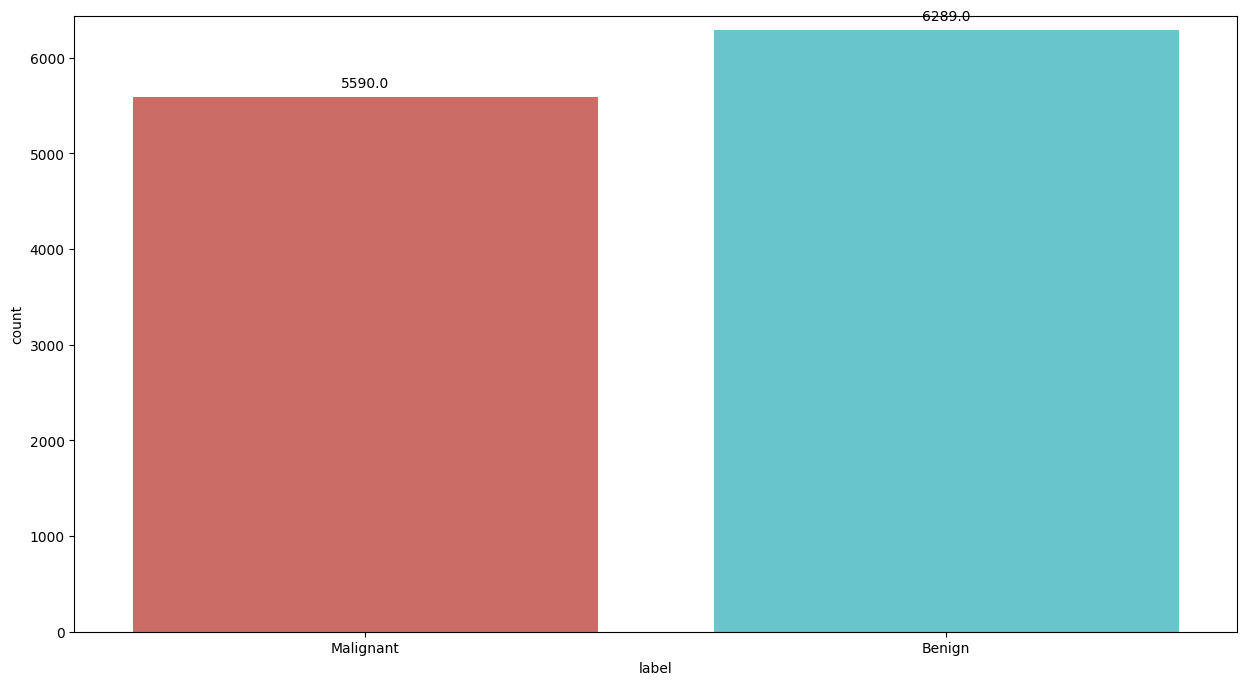

In [ ]:
plt.figure(figsize=(15, 8))

ax = sns.countplot(x='label', data=df, palette='hls')
ax.set_ylim(0, df['label'].value_counts().max() + 150)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 10),
                textcoords='offset points', ha='center', va='center')

plt.show()

In [ ]:
label_counts = df['label'].value_counts()

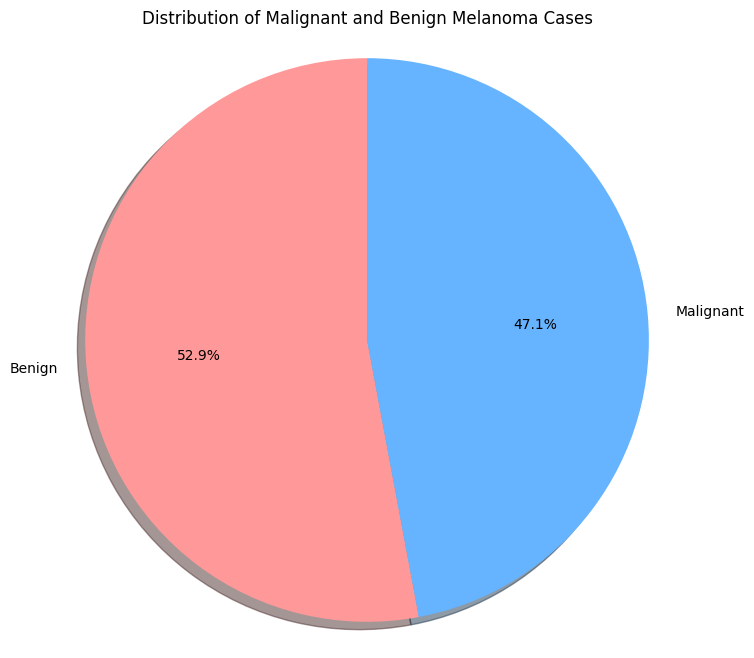

In [ ]:
plt.figure(figsize=(8, 8))

plt.pie(label_counts,
        labels=label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff'],
        shadow=True)

plt.axis('equal')
plt.title('Distribution of Malignant and Benign Melanoma Cases')
plt.show()

In [ ]:
malignant_images = os.listdir(malignant_dir)
benign_images = os.listdir(benign_dir)

malignant_sample = np.random.choice(malignant_images, 5, replace=False)
benign_sample = np.random.choice(benign_images, 5, replace=False)

In [ ]:
import matplotlib.image as mpimg

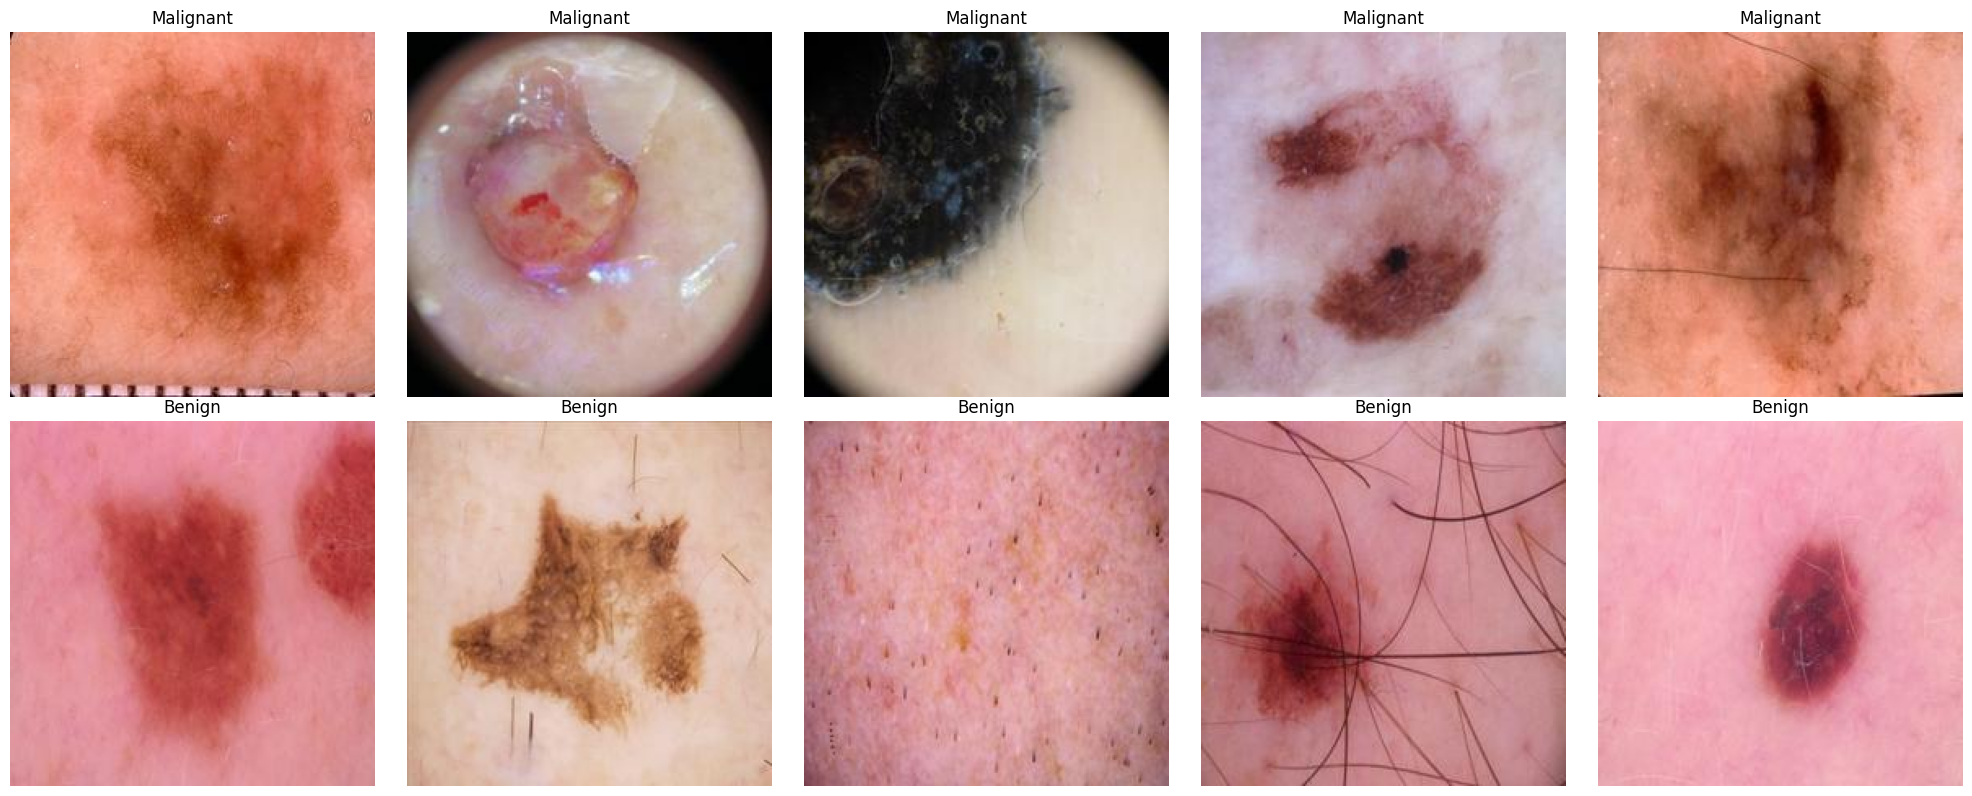

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for ax, img_name in zip(axes[0], malignant_sample):
    img_path = os.path.join(malignant_dir, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Malignant')

for ax, img_name in zip(axes[1], benign_sample):
    img_path = os.path.join(benign_dir, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Benign')

plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['label'])

In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['label'] = y_resampled

In [ ]:
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
Malignant    6289
Benign       6289
Name: count, dtype: int64


In [ ]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [ ]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 10062 validated image filenames belonging to 2 classes.
Found 1258 validated image filenames belonging to 2 classes.
Found 1258 validated image filenames belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def create_xception_model(input_shape):

    base_model = Xception(weights='imagenet', input_shape=input_shape, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GaussianNoise(0.25))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(GaussianNoise(0.25))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[earlystopping],
    verbose=1
)

Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 77s 94ms/step - accuracy: 0.7981 - loss: 0.4519 - val_accuracy: 0.8800 - val_loss: 0.3040
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8654 - loss: 0.3244 - val_accuracy: 0.8847 - val_loss: 0.2841
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8739 - loss: 0.2925 - val_accuracy: 0.8847 - val_loss: 0.2884
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8853 - loss: 0.2741 - val_accuracy: 0.8935 - val_loss: 0.2756
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8936 - loss: 0.2658 - val_accuracy: 0.8839 - val_loss: 0.2729
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9003 - loss: 0.2375 - val_accuracy: 0.8927 - val_loss: 0.2736
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.9098 - loss: 0.2216 - val_accuracy: 0.8824 - val_loss: 0.2864
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9174 - loss: 0.2089 - 

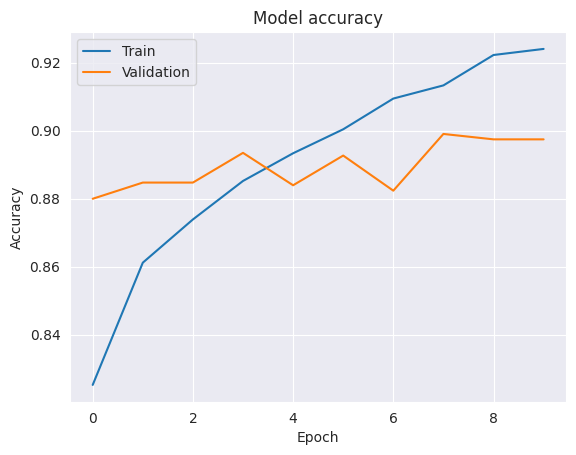

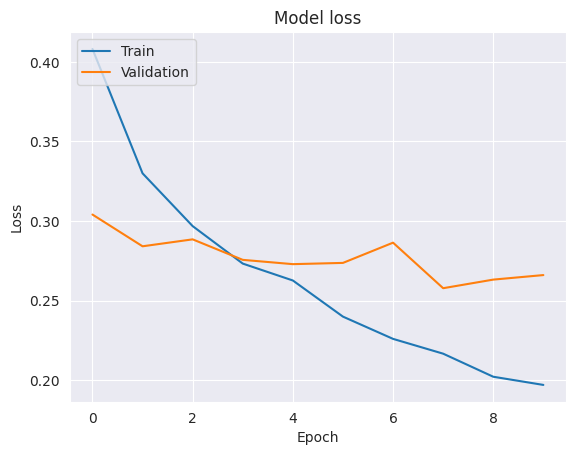

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step


In [ ]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.88      0.84      0.86       629
   Malignant       0.85      0.88      0.86       629

    accuracy                           0.86      1258
   macro avg       0.86      0.86      0.86      1258
weighted avg       0.86      0.86      0.86      1258



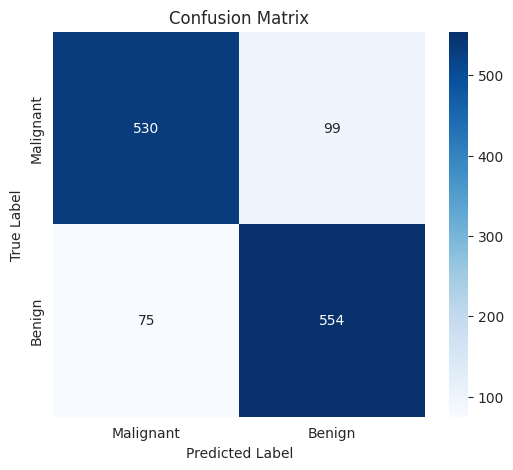

In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
cnn_model.save("cnn_model.h5")  # Saves the model in HDF5 format


